<a href="https://colab.research.google.com/github/a2c6201/machine-learning-book/blob/main/ch06_learn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 機械学習プログラミング PyTorch & Scikit-Learn編

# 6 章 - モデルの評価とハイパーパラメーターのチューニングのベストプラクティス

# パイプラインによるワークフローの効率化

## Breast Cancer Wisconsinデータセットの取得

In [ ]:
# インポート&省略
import pandas as pd

# データセットの読み込み
df = pd.read_csv('https://archive.ics.uci.edu/ml/'
                 'machine-learning-databases'
                 '/breast-cancer-wisconsin/wdbc.data', header=None)

# 確認のため最初の5個のみ表示
df.head()

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
# (データ数, 特徴量)を表示
df.shape

(569, 32)

<hr>

In [ ]:
# データセットを特徴量(X)とラベル(y)に分割
from sklearn.preprocessing import LabelEncoder

X = df.loc[:, 2:].values
y = df.loc[:, 1].values
le = LabelEncoder()
y = le.fit_transform(y)
print(y)
le.classes_

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 0 1 1 1 1 1 1 1 1 0 1 0 0 0 0 0 1 1 0 1 1 0 0 0 0 1 0 1 1 0 0 0 0 1 0 1 1
 0 1 0 1 1 0 0 0 1 1 0 1 1 1 0 0 0 1 0 0 1 1 0 0 0 1 1 0 0 0 0 1 0 0 1 0 0
 0 0 0 0 0 0 1 1 1 0 1 1 0 0 0 1 1 0 1 0 1 1 0 1 1 0 0 1 0 0 1 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 1 0 0 1 1 0 0 1 1 0 0 0 0 1 0 0 1 1 1 0 1
 0 1 0 0 0 1 0 0 1 1 0 1 1 1 1 0 1 1 1 0 1 0 1 0 0 1 0 1 1 1 1 0 0 1 1 0 0
 0 1 0 0 0 0 0 1 1 0 0 1 0 0 1 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 0 0 0 0 0 0 1 0 1 0 0 1 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 1 1 1 0 0
 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1
 1 0 1 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 1 0 0 0 0 0 1 0 0
 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 1 0 1 0 0 1 

array(['B', 'M'], dtype=object)

In [ ]:
# (M , B)を(1, 0)に変換
le.transform(['M', 'B'])

array([1, 0])

In [ ]:
# データを訓練用(80%)とテスト用(20%)に分割
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = \
    train_test_split(X, y,
                     test_size=0.20,
                     stratify=y,
                     random_state=1)

<br>
<br>

## パイプラインで変換器と推定器を結合する

In [ ]:
# パイプラインに前処理と学習手法を組み込みデータセットに適用

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
# パイプラインにスケーリング、次元削減、ロジスティック回帰を組み込む
pipe_lr = make_pipeline(StandardScaler(),
                        PCA(n_components=2),
                        LogisticRegression())
# 精度を計算
pipe_lr.fit(X_train, y_train)
# y_pred = pipe_lr.predict(X_test)
test_acc = pipe_lr.score(X_test, y_test)
print(f'Test accuracy: {test_acc:.3f}')

Test accuracy: 0.956


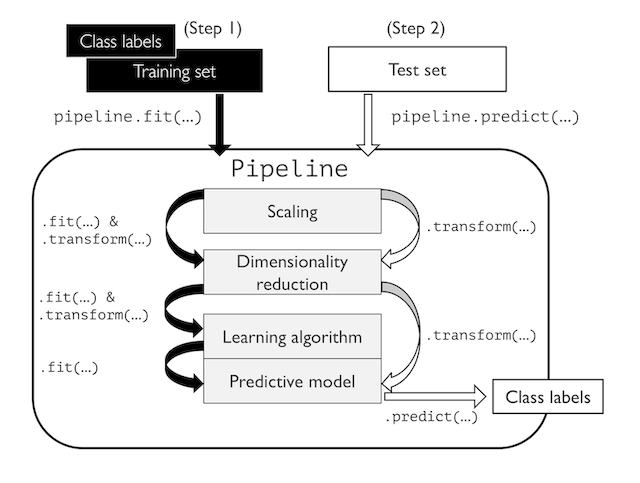

# k分割交差検証を使ったモデルの性能の評価

## ホールドアウト法

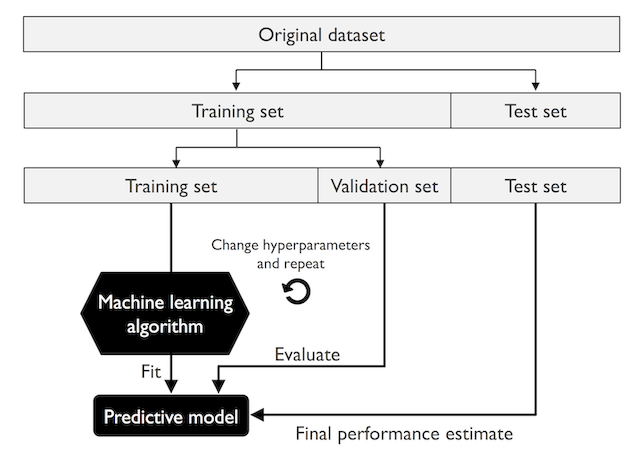

## k分割交差検証

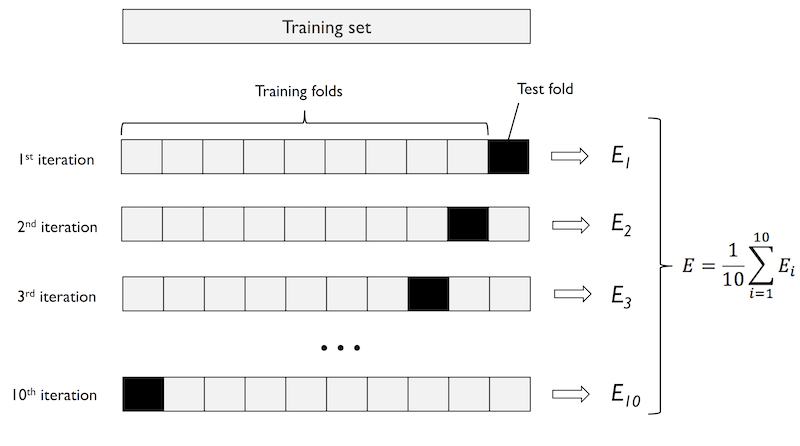

In [ ]:
import numpy as np
from sklearn.model_selection import StratifiedKFold
# (分割数=10)を指定し、k分割交差検証イテレータを表すStraitfiedKFoldクラスをインスタンス化
kfold = StratifiedKFold(n_splits=10).split(X_train, y_train)
scores = []

# イテレータのインデックスと要素をループ処理：(上から順に)
for k, (train, test) in enumerate(kfold):

    # データをモデルに適合
    pipe_lr.fit(X_train[train], y_train[train])

    # テストデータの正解率を算出
    score = pipe_lr.score(X_train[test], y_train[test])

    # リストに正解率を追加
    scores.append(score)

    # 分割の番号、0 以上の要素数、正解を出力
    print(f'Fold: {k+1:02d}, '
          f'Class distr.: {np.bincount(y_train[train])}, '
          f'Acc.: {score:.3f}')

# 正解率の平均と標準偏差を出力
mean_acc = np.mean(scores)
std_acc = np.std(scores)
print(f'\nCV accuracy: {mean_acc:.3f} +/- {std_acc:.3f}')

Fold: 01, Class distr.: [256 153], Acc.: 0.935
Fold: 02, Class distr.: [256 153], Acc.: 0.935
Fold: 03, Class distr.: [256 153], Acc.: 0.957
Fold: 04, Class distr.: [256 153], Acc.: 0.957
Fold: 05, Class distr.: [256 153], Acc.: 0.935
Fold: 06, Class distr.: [257 153], Acc.: 0.956
Fold: 07, Class distr.: [257 153], Acc.: 0.978
Fold: 08, Class distr.: [257 153], Acc.: 0.933
Fold: 09, Class distr.: [257 153], Acc.: 0.956
Fold: 10, Class distr.: [257 153], Acc.: 0.956

CV accuracy: 0.950 +/- 0.014


In [ ]:
from sklearn.model_selection import cross_val_score
# 交差検証のcross_val_score関数でモデルの正解率を算出
# 推定器estimator、訓練データX、予測値yを指定
scores = cross_val_score(estimator=pipe_lr,
                         X=X_train,
                         y=y_train,
                         cv=10,      # データの分割数
                         n_jobs=1)   # 計算に使用するCPU数
# 正解の平均値と標準偏差を表示 (3fは小数点以下3桁まで)
print(f'CV accuracy scores: {scores}')
print(f'CV accuracy: {np.mean(scores):.3f} '
      f'+/- {np.std(scores):.3f}')

CV accuracy scores: [0.93478261 0.93478261 0.95652174 0.95652174 0.93478261 0.95555556
 0.97777778 0.93333333 0.95555556 0.95555556]
CV accuracy: 0.950 +/- 0.014


<br>
<br>

# 学習曲線と検証曲線によるアルゴリズムの診断

<br>
<br>

## 学習曲線を使ってバイアスとバリアンスの問題を診断する

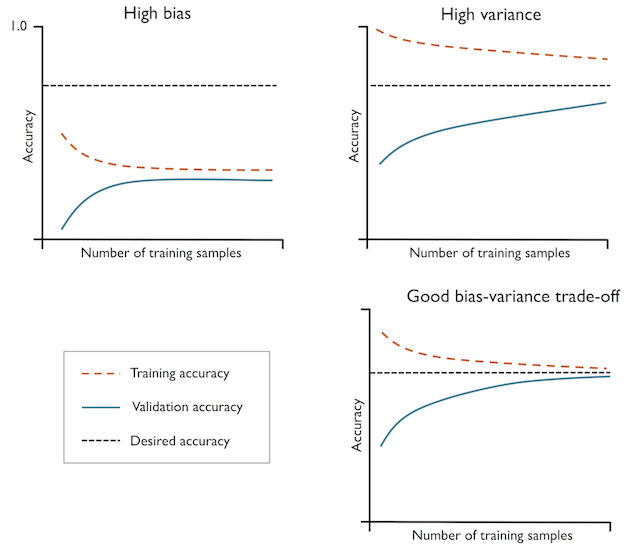

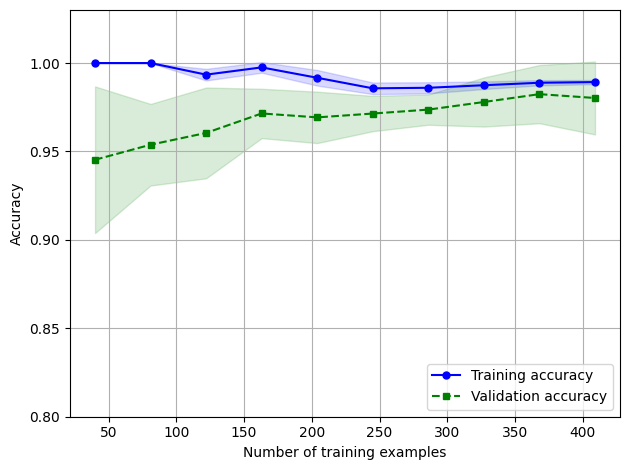

In [ ]:
# 学習曲線を描画する

import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
pipe_lr = make_pipeline(StandardScaler(),
                        LogisticRegression(penalty='l2', max_iter=10000))
# learning_curve関数で交差検証による正解率を算出
train_sizes, train_scores, test_scores =\
                learning_curve(estimator=pipe_lr,  # 訓練スコアとバリデーションスコアを計算
                               X=X_train,
                               y=y_train,
                               # 訓練データサイズの決定 10%~100% 10等分
                               train_sizes=np.linspace(0.1, 1.0, 10),
                               cv=10,     #分割数
                               n_jobs=1)  #使用するCPU数

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# 平均スコアとその標準偏差をプロット、標準偏差の範囲を塗りつぶす
plt.plot(train_sizes, train_mean,
         color='blue', marker='o',
         markersize=5, label='Training accuracy')
# fill_between関数で平均精度±標準偏差の範囲を青色で塗りつぶす
plt.fill_between(train_sizes,
                 train_mean + train_std,
                 train_mean - train_std,
                 # 透明度   , 塗りつぶす色
                 alpha=0.15, color='blue')
# バリデーションデータの平均精度を緑色の点線でプロット
plt.plot(train_sizes, test_mean,
         color='green', linestyle='--',
         marker='s', markersize=5,
         label='Validation accuracy')
# バリデーションデータの平均精度±標準偏差の範囲を緑色で塗りつぶす
plt.fill_between(train_sizes,
                 test_mean + test_std,
                 test_mean - test_std,
                 alpha=0.15, color='green')
# グラフ見た目の調整
plt.grid()                                 # グリッド(格子)を表示
plt.xlabel('Number of training examples')  # x軸の名称を設定
plt.ylabel('Accuracy')                     # y軸の名称を設定
plt.legend(loc='lower right')              # 凡例を表示
plt.ylim([0.8, 1.03])                      # y軸の表示範囲を設定
plt.tight_layout()                         # プロットのレイアウトを自動で調整
plt.show()                                 # グラフの表示

<br>
<br>

## 検証曲線を使って過学習と学習不足を明らかにする

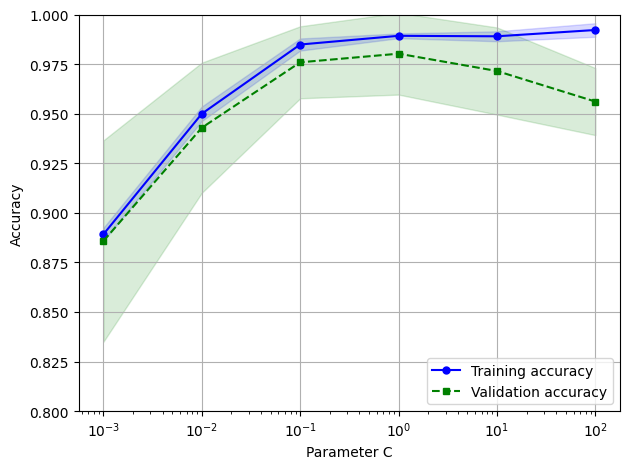

In [ ]:
from sklearn.model_selection import validation_curve

# パラメータの範囲を定義 0.001~100までの対数スケールで定義
param_range = [0.001, 0.01, 0.1, 1.0, 10.0, 100.0]
# validation_curve関数によりモデルのパラメータを変化させ、交差検証による正解率を算出
# logisticregression_CはLogisticRegressionオブジェクトのパラメータ
# validation_curve関数を使用して訓練スコアとテストスコアを計算する
train_scores, test_scores = validation_curve(
                estimator=pipe_lr,                  # 評価するモデルを指定
                X=X_train,                          # 学習データを指定
                y=y_train,                          # 学習データを指定
                param_name='logisticregression__C', # 調整を行うパラメータを指定
                param_range=param_range,            # 調整を行うパラメータを指定
                cv=10)                              # 交差検証の分割数

train_mean = np.mean(train_scores, axis=1) # 各分割に対する訓練スコアの平均算出
train_std = np.std(train_scores, axis=1)   # 各分割に対する訓練スコアの標準偏差を算出
test_mean = np.mean(test_scores, axis=1)   # 各分割に対するテストスコアの平均算出
test_std = np.std(test_scores, axis=1)     # 各分割に対するテストスコアの標準偏差を算出

# 訓練データの正解率（平均）をプロット
plt.plot(param_range, train_mean,  # X軸 パラメータCの値, y軸 訓練データの正解率の平均
         color='blue', marker='o',
         markersize=5, label='Training accuracy')
#
plt.fill_between(param_range, train_mean + train_std, # X軸 パラメータCの値,
                                                      # y軸 データの中心位置からばらつき
                 train_mean - train_std, alpha=0.15,  # , 透明度,
                 color='blue')                        # 塗りつぶす色

plt.plot(param_range, test_mean,        # X軸はパラメータCの値、y軸はテストデータの正解率の平均
         color='green', linestyle='--',
         marker='s', markersize=5,
         label='Validation accuracy')

plt.fill_between(param_range,
                 test_mean + test_std,
                 test_mean - test_std,
                 alpha=0.15, color='green')  # 透明度, 塗りつぶす色

# グラフ見た目の調整
plt.grid()                     # グリッド(格子)を表示
plt.xscale('log')              # x軸を対数表示
plt.legend(loc='lower right')  # 凡例を表示
plt.xlabel('Parameter C')      # x軸の名称を設定
plt.ylabel('Accuracy')         # y軸の名称を設定
plt.ylim([0.8, 1.0])           # y軸の表示範囲を設定
plt.tight_layout()             # プロットのレイアウトを自動で調整
plt.show()                     # プロットを表示

<br>
<br>

# グリッドサーチによる機械学習モデルのチューニング

<br>
<br>

## グリッドサーチを使ったハイパーパラメータのチューニング

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

# 複数の前処理ステップと一つ以上の推定器を結合する
pipe_svc = make_pipeline(StandardScaler(),
                         SVC(random_state=1))
# ハイパーパラメータの値の候補を定義
param_range = [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]

param_grid = [{'svc__C': param_range,
               'svc__kernel': ['linear']},
              {'svc__C': param_range,
               'svc__gamma': param_range,
               'svc__kernel': ['rbf']}]
# ハイパーパラメータ値のリストparam_gridを指定し
# グリッドサーチを行うGridSearchCVクラスをインスタンス化
gs = GridSearchCV(estimator=pipe_svc,    # 使用するモデルの指定
                  param_grid=param_grid, # 探索するハイパーパラメータのグリッド指定
                  scoring='accuracy',    # 評価指標の指定
                  refit=True,            # 再トレーニングするかどうか
                  cv=10)                 # 分割数
# モデルの最良スコアを出力
gs = gs.fit(X_train, y_train)
print(gs.best_score_)          # 最も高いスコアを表示

# 最良スコアとなるパラメータ値を出力
print(gs.best_params_)         # 最良のモデルに対応するハイパーパラメータの値を表示

0.9846859903381642
{'svc__C': 100.0, 'svc__gamma': 0.001, 'svc__kernel': 'rbf'}


In [ ]:
# clfに最もパフォーマンスが良かったモデルを割り当てる
clf = gs.best_estimator_
clf.fit(X_train, y_train)
# モデルの精度を評価し結果を小数点以下３桁まで表示
print(f'Test accuracy: {clf.score(X_test, y_test):.3f}')

Test accuracy: 0.974


In [ ]:
# RandomizedSearchCV ランダムに値を選んでモデルを学習・評価できる
from sklearn.model_selection import RandomizedSearchCV


pipe_svc = make_pipeline(
    StandardScaler(),
    SVC(random_state=1))

param_grid = [{'svc__C': param_range,
               'svc__kernel': ['linear']},
              {'svc__C': param_range,
               'svc__gamma': param_range,
               'svc__kernel': ['rbf']}]


rs = RandomizedSearchCV(estimator=pipe_svc,  # 評価対象のモデルを指定
                        param_distributions=param_grid,  # 探索範囲を指定
                        scoring='accuracy',  # 性能評価の指標
                        refit=True,  # 最良のハイパーパラメータを見つけた後、それ使用してモデル全体を再訓練
                        n_iter=20,   # ハイパーパラメータ探索の反復回数
                        cv=10,       # 分割数
                        random_state=1,  # 乱数のシード値を設定
                        n_jobs=-1)   # 使用するCPU数

In [ ]:
# ランダムサーチを使ったハイパーパラメータチューニングの適用と表示
rs = rs.fit(X_train, y_train)
print(rs.best_score_)  # 最良のパワメータを組み合わせたモデルの平均スコア(正確さ)を表示

0.9737681159420291


In [ ]:
# 属性の表示
print(rs.best_params_)

{'svc__kernel': 'rbf', 'svc__gamma': 0.001, 'svc__C': 10.0}


## ランダムサーチを使ってハイパーパラメータ設定をより広範に探索する

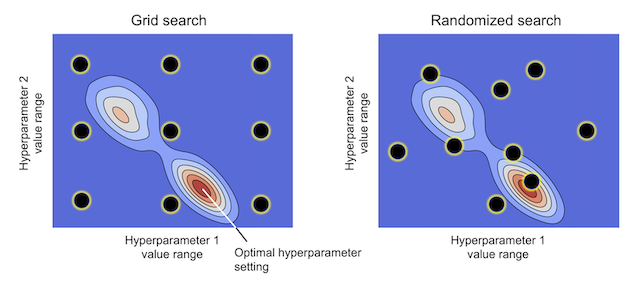

In [ ]:
# 計算を行うためのライブラリをインポート
import scipy.stats

# リスト形式でハイパーパラメータの候補となる値を設定
param_range = [0.0001, 0.001, 0.01, 0.1,
               1.0, 10.0, 100.0, 1000.0]

param_range = scipy.stats.loguniform(0.0001, 1000.0)

np.random.seed(1)    # 乱数生成器のシード値を設定
param_range.rvs(10)  # 生成した中からランダムで10個の値をサンプリング

array([8.30145146e-02, 1.10222804e+01, 1.00184520e-04, 1.30715777e-02,
       1.06485687e-03, 4.42965766e-04, 2.01289666e-03, 2.62376594e-02,
       5.98924832e-02, 5.91176467e-01])

## Successive Halvingによるリソース効率のよいハイパーパラメータ探索

In [ ]:
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingRandomSearchCV

In [ ]:
hs = HalvingRandomSearchCV(
    pipe_svc,
    param_distributions=param_grid,  # チューニング対象のハイパーパラメータの候補範囲
    n_candidates='exhaust',          # 評価するハイパーパラメータの設定の数 exhaustは全て試す意味
    resource='n_samples',            # リソースパラメータを指定
    factor=1.5,                      # リソースをどの程度増やすか
    random_state=1,                  # 乱数生成器のシード値を固定
    n_jobs=-1)                       # 使用するCPU数

In [ ]:
hs = hs.fit(X_train, y_train)  # インスタンス（hs）を訓練データに適合
print(hs.best_score_)   # 交差検証で得られた最良のスコア（平均精度）を出力
print(hs.best_params_)  # 最良のパラメータセットを出力

0.9676470588235293
{'svc__kernel': 'rbf', 'svc__gamma': 0.0001, 'svc__C': 100.0}


In [ ]:
clf = hs.best_estimator_  # 最適なパラメータで訓練されたモデルを取得
print(f'Test accuracy: {hs.score(X_test, y_test):.3f}')  # テストデータに対する精度を小数点以下３桁まで表示

Test accuracy: 0.965


<br>
<br>

## 入れ子の交差検証によるアルゴリズムの選択

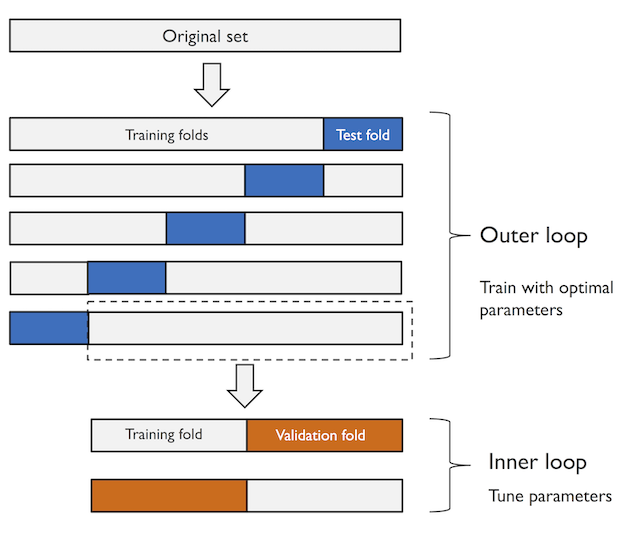

In [ ]:
gs = GridSearchCV(estimator=pipe_svc,
                  param_grid=param_grid,
                  scoring='accuracy',     # 評価指標
                  cv=2)                   # 分割数

scores = cross_val_score(gs, X_train, y_train,      # 訓練データで交差検証の実行
                         scoring='accuracy', cv=5)  # 評価指標, 分割数
# 交差検証の結果を表示
print(f'CV accuracy: {np.mean(scores):.3f} '  # 検証精度の平均(.以下３桁)
      f'+/- {np.std(scores):.3f}')            # 検証精度の標準偏差(.以下３桁)

CV accuracy: 0.974 +/- 0.015


In [ ]:
from sklearn.tree import DecisionTreeClassifier
# ハイパーパラメータ値として決定木の深さパラメータを指定し、
# グリッドサーチを行うGridSearchCVクラスをインスタンス化
gs = GridSearchCV(estimator=DecisionTreeClassifier(random_state=0),
                  param_grid=[{'max_depth': [1, 2, 3, 4, 5, 6, 7, None]}],
                  scoring='accuracy',  # 評価指標
                  cv=2)                # 分割数

scores = cross_val_score(gs, X_train, y_train,      # 訓練データで交差検証を実行
                         scoring='accuracy', cv=5)  # 評価指標, 分割数
print(f'CV accuracy: {np.mean(scores):.3f} '        # 検証精度の平均(.以下3桁)
      f'+/- {np.std(scores):.3f}')                  # 検証精度の標準偏差(.以下３桁)

CV accuracy: 0.934 +/- 0.016


<br>
<br>

# さまざまな性能評価指標

...

## 混同行列(confusion matrix)を解釈する

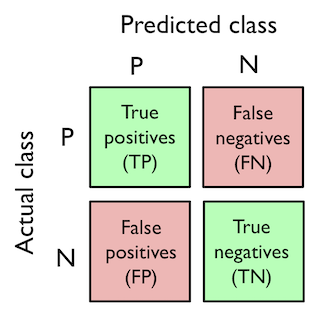

In [ ]:
from sklearn.metrics import confusion_matrix  # 混同行列を生成する関数インポート

pipe_svc.fit(X_train, y_train)     # 訓練データに対して学習を実行
y_pred = pipe_svc.predict(X_test)  # 訓練したpipe_svcにテストデータを使って予測を行う
# テストデータと予測値から混同行列を生成
confmat = confusion_matrix(y_true=y_test, y_pred=y_pred)  # 混同行列を生成(実際のラベル, 予測されたラベル)
print(confmat)  # 混同行列を表示

[[71  1]
 [ 2 40]]


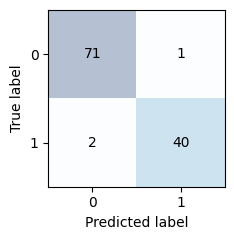

In [ ]:
# 上の混同行列を見やすい図にする

fig, ax = plt.subplots(figsize=(2.5, 2.5))  # 図の生成(サイズ指定)
# matshow関数で行列からヒートマップを描画
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)  # 表示する混同行列, 青系統で表示, 透明度は0.3
for i in range(confmat.shape[0]):     # クラス0の繰り返し処理
    for j in range(confmat.shape[1]): # クラス1の繰り返し処理
        ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')  # 件数を表示
ax.xaxis.set_ticks_position('bottom')  # X軸の目盛りの位置を下側に設定

plt.xlabel('Predicted label')  # X軸の名称を設定
plt.ylabel('True label')       # Y軸の名称を設定

plt.tight_layout()  # プロットのレイアウトを自動で調整
plt.show()  # ヒートマップの表示

### 追記

以前に、*悪性* の例が「陽性」クラス (1) になり、*良性* の例が「陰性」クラス (0) になるようにクラス ラベルをエンコードしたことを思い出してください。

In [ ]:
le.transform(['M', 'B'])

array([1, 0])

In [ ]:
confmat = confusion_matrix(y_true=y_test, y_pred=y_pred)
print(confmat)

[[71  1]
 [ 2 40]]


次に、混同行列を次のように出力しました。

In [ ]:
confmat = confusion_matrix(y_true=y_test, y_pred=y_pred)
print(confmat)

[[71  1]
 [ 2 40]]


ノート：
クラス 0 (真陰性) として正しく予測される (真の) クラス 0 の例は、行列の左上隅 (インデックス 0, 0) にあることに注意してください。 真陰性が右下隅 (インデックス 1,1) に配置され、真陽性が左上に配置されるように順序を変更するには、以下に示すように label 引数を使用できます。

In [ ]:
confmat = confusion_matrix(y_true=y_test, y_pred=y_pred, labels=[1, 0])
print(confmat)

[[40  2]
 [ 1 71]]


結論：
この例ではクラス 1 (悪性) が陽性クラスであると仮定すると、モデルはクラス 0 (真陰性) に属する 71 例とクラス 1 (真陽性) に属する 40 例をそれぞれ正しく分類しました。 しかし、私たちのモデルはまた、クラス 0 の 1 例をクラス 1 として誤って分類し (偽陽性)、悪性腫瘍であるにもかかわらず 2 例が良性であると予測しました (偽陰性)。

<br>
<br>

## 分類モデルの適合率と再現率を最適化する

In [ ]:
# 適合率、再現率、F1スコア、MCCを出力

# モデルの評価指標を計算するための関数をインポート
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import matthews_corrcoef

pre_val = precision_score(y_true=y_test, y_pred=y_pred) # 適合率を計算&格納
print(f'Precision: {pre_val:.3f}')                      # 適合率を表示

rec_val = recall_score(y_true=y_test, y_pred=y_pred)    # 再現率を計算&格納
print(f'Recall: {rec_val:.3f}')                         # 再現率を表示

f1_val = f1_score(y_true=y_test, y_pred=y_pred)         # F1スコアを計算&格納
print(f'F1: {f1_val:.3f}')                              # F1スコアを表示

mcc_val = matthews_corrcoef(y_true=y_test, y_pred=y_pred) # マシューズ相関係数を計算&格納
print(f'MCC: {mcc_val:.3f}')                              # マシューズ相関係を表示

Precision: 0.976
Recall: 0.952
F1: 0.964
MCC: 0.943


In [ ]:
#　上記の性能指標以外の性能指標の例
from sklearn.metrics import make_scorer

scorer = make_scorer(f1_score, pos_label=0)  # クラスラベル0を陽性クラスとして扱い、そのクラスに対するF1スコアが計算

c_gamma_range = [0.01, 0.1, 1.0, 10.0]  # Cパラメータとγパラメータの値の範囲を定義

param_grid = [{'svc__C': c_gamma_range,
               'svc__kernel': ['linear']},
              {'svc__C': c_gamma_range,
               'svc__gamma': c_gamma_range,
               'svc__kernel': ['rbf']}]

gs = GridSearchCV(estimator=pipe_svc,     # 評価対象のモデルを指定
                  param_grid=param_grid,  # 探索範囲を指定
                  scoring=scorer,         # 評価指標の指定
                  cv=10,                  # 分割数
                  n_jobs=-1)              # CPU数
gs = gs.fit(X_train, y_train)             # トレーニングデータでモデルをフィットさせる
print(gs.best_score_)                     # 最高のスコア(F1スコア)を表示
print(gs.best_params_)                    # 最高スコア時のパラメータ組み合わせを表示

0.9861994953378878
{'svc__C': 10.0, 'svc__gamma': 0.01, 'svc__kernel': 'rbf'}


<br>
<br>

## ROC曲線をプロットする

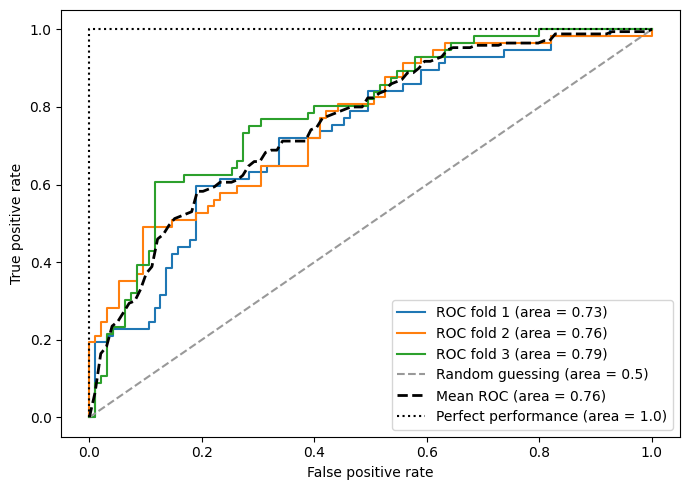

In [ ]:
from sklearn.metrics import roc_curve, auc
from numpy import interp

# スケーリング、次元削減、ロジスティク回帰を指定をpipeline関数に組み込む
pipe_lr = make_pipeline(StandardScaler(),
                        PCA(n_components=2),                # 特徴量の数を削減
                        LogisticRegression(penalty='l2',    # L2正則化
                                           random_state=1,  # 乱数のシード値を設定
                                           solver='lbfgs',  # 最適化アルゴリズムとしてLBFGS法を指定
                                           C=100.0))        # 正則化の強さ
# 2つの特徴量を抽出
X_train2 = X_train[:, [4, 14]]

# 3分割交差検証を行う
cv = list(StratifiedKFold(n_splits=3).split(X_train, y_train)) # 分割数=3

fig = plt.figure(figsize=(7, 5))  # 図の作成(サイズ指定)

mean_tpr = 0.0  # 平均真陽性率（mean_tpr）を初期化
# 0から1までの間で100個の要素を生成
mean_fpr = np.linspace(0, 1, 100)  # 0から1までの範囲を100分割した値を生成
all_tpr = []  # 真陽性率の値を格納するための空のリスト作成

for i, (train, test) in enumerate(cv):  # 格納された交差検証の分割インデックスを順番に取り出す
    # predict_probaメソットで確率を予測、fitメソッドでモデルに適合させる
    probas = pipe_lr.fit(X_train2[train],
                         y_train[train]).predict_proba(X_train2[test])
    # roc_curve関数でROC曲線の性能を計算してプロット
    fpr, tpr, thresholds = roc_curve(y_train[test], #
                                     probas[:, 1],  # クラス1（陽性）の予測確率
                                     pos_label=1)   # 陽性クラスを指定
    mean_tpr += interp(mean_fpr, fpr, tpr)  # FPR (X軸) とTPR (Y軸) を線形補間
    mean_tpr[0] = 0.0                       # 平均真陽性率の最初の要素を0に設定
    roc_auc = auc(fpr, tpr)                 # 曲線下面積 (AUC) を計算
    plt.plot(fpr,                           # FPR, TPRをプロット
             tpr,
             label=f'ROC fold {i+1} (area = {roc_auc:.2f})')

# 当て推量をプロット
plt.plot([0, 1],                                # FPRの値の範囲
         [0, 1],                                # TPRの値の範囲
         linestyle='--',                        # 直線のスタイルは破線
         color=(0.6, 0.6, 0.6),                 # 色は灰色
         label='Random guessing (area = 0.5)')  # ランダムな予測モデルの面積が0.5

# FPR、TPR、ROC、AUCそれぞれの平均を計算してプロット
mean_tpr /= len(cv)                 # 平均真陽性率を分割数で割り、正規化
mean_tpr[-1] = 1.0                  # 平均真陽性率の最後の要素を1に設定
mean_auc = auc(mean_fpr, mean_tpr)  # 平均ROC曲線の下の面積を計算
plt.plot(mean_fpr, mean_tpr, 'k--', # 平均FPRと平均TPRをプロット
         label=f'Mean ROC (area = {mean_auc:.2f})', lw=2)

# 完全に予測が正解したときのROC曲線をプロット
plt.plot([0, 0, 1],      # x座標 直線の始点、折れ曲がり点、終点の座標
         [0, 1, 1],      # y座標
         linestyle=':',  # 直線のスタイル'破線'
         color='black',  # 色
         label='Perfect performance (area = 1.0)')  # 直線のラベル

# グラフの各項目を指定
plt.xlim([-0.05, 1.05])            # X軸の表示範囲
plt.ylim([-0.05, 1.05])            # y軸の表示範囲
plt.xlabel('False positive rate')  # X軸の名称
plt.ylabel('True positive rate')   # y軸の名称
plt.legend(loc='lower right')      # 凡例表示
plt.tight_layout()  # レイアウトを自動で調整
plt.show()          # ROC曲線を表示

<br>
<br>

## 多クラス分類のための性能指標

In [ ]:
pre_scorer = make_scorer(score_func=precision_score,  # カスタムのスコア関数を作成
                         pos_label=1,                 # パラメータには1が指定
                         greater_is_better=True,      # スコアが大きいほど良いと評価
                         average='micro')             # パラメータ設定

## クラスの不均衡に対処する

In [ ]:
# クラスの不均衡なデータセットからサンプリングを行い、新しいデータセットを作成
X_imb = np.vstack((X[y == 0], X[y == 1][:40]))
y_imb = np.hstack((y[y == 0], y[y == 1][:40]))

In [ ]:
# 全ての予測をクラス0として行った場合の正確性（精度）を計算
y_pred = np.zeros(y_imb.shape[0])
np.mean(y_pred == y_imb) * 100     # ×100で％表示

89.92443324937027

In [ ]:
from sklearn.utils import resample

print('Number of class 1 examples before:', X_imb[y_imb == 1].shape[0])
# データ点の個数がクラス0と同じになるまで新しいデータ点を復元抽出
X_upsampled, y_upsampled = resample(X_imb[y_imb == 1],  # アップサンプリングを行う
                                    y_imb[y_imb == 1],
                                    replace=True,       # データの復元抽出を許可
                                    n_samples=X_imb[y_imb == 0].shape[0],
                                    random_state=123)   # 乱数のシード値
# アップサンプリング後のクラス1のデータの数を表示
print('Number of class 1 examples after:', X_upsampled.shape[0])

Number of class 1 examples before: 40
Number of class 1 examples after: 357


In [ ]:
# アップサンプリングされたデータを元のデータセットに統合して、
# クラスのバランスを取ったデータセットを作成
X_bal = np.vstack((X[y == 0], X_upsampled))
y_bal = np.hstack((y[y == 0], y_upsampled))

In [ ]:
# モデルの予測の精度を評価
y_pred = np.zeros(y_bal.shape[0])
np.mean(y_pred == y_bal) * 100    # すべての予測が正しくクラス0と一致している場合の正解率

50.0

<br>
<br>

In [ ]:
#ここから課題だよ〜
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


rng = np.random.default_rng(10)
theta = rng.uniform(0, 2*np.pi, 100)
x = np.cos(theta)
y = np.sin(theta)


class_labels = np.where((x < 0.25) & (y > -0.25),  1, 0)

X_train, X_test, y_train, y_test = train_test_split(np.column_stack((x, y)), class_labels, test_size=0.8, random_state=42)

#karnel=''の中に入るカーネルを調べて数種類試してください
svm = SVC(kernel='')
svm.fit(X_train, y_train)

y_pred = svm.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

#以降にカーネルごとに性能を評価してください。正解精度、適合率、再現率など


InvalidParameterError: ignored

# Summary